<h1 style="text-align: center;">Laptop Price Prediction</h1>



<img src="https://media.product.which.co.uk/prod/images/original/22a475e555d7-best-laptop-deals.jpg">

### A regression model has been developed to predict laptop prices based on their specifications. The purpose of this model is to assist users and sellers by providing more accurate and reliable price information, thus aiding in the determination and comparison of laptop prices.

## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)

In [2]:
df = pd.read_csv("laptop_data.csv", index_col=0)

In [3]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
Price,1303.0,59870.042910,37243.201786,9270.72,31914.72,52054.56,79274.2464,324954.72


In [6]:
df.isnull().sum()#There's no empty data.

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [7]:
df["Company"].value_counts()

,count
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [8]:
df.TypeName.value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


In [9]:
df.Inches.value_counts()

,count
Inches,
15.6,665
14.0,197
13.3,164
17.3,164
12.5,39
11.6,33
12.0,6
13.5,6
13.9,6


In [10]:
df.ScreenResolution.value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


Feature Engineering for IPS, Touchscreen, HD

In [11]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

To calculate PPI, I am defining the resolution in a new column.

In [12]:
import re

In [13]:
def extract_resolution(resolution_string):
    match = re.search(r'(\d+x\d+)', resolution_string)
    return match.group(1) if match else None

# 'Resolution' bilgisini içeren yeni bir sütun oluşturma
df['Resolution'] = df['ScreenResolution'].apply(extract_resolution)

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,2560x1600


In [15]:
df.Cpu.value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
Intel Core i5 6200U 2.3GHz,68
Intel Core i3 6006U 2GHz,64
Intel Core i7 6500U 2.5GHz,49
Intel Core i7 6700HQ 2.6GHz,43


Feature Engineering for GHz

In [16]:
def extract_ghz(cpu_string):
    match = re.search(r'(\d+(\.\d+)?)GHz', cpu_string)
    return float(match.group(1)) if match else None

# 'GHz' bilgilerini içeren yeni bir sütun oluşturma
df['GHz'] = df['Cpu'].apply(extract_ghz)
df['GHz']=df['GHz'].astype(float)

In [17]:
df.Ram.value_counts()

,count
Ram,
8GB,619
4GB,375
16GB,200
6GB,41
12GB,25
2GB,22
32GB,17
24GB,3
64GB,1


In [18]:
df['Ram']=df['Ram'].str.replace('GB','').astype('int')

In [19]:
df.Memory.value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [20]:
df['Memory']=df['Memory'].str.replace('.0','')
df['Memory']=df['Memory'].str.replace('TB','000GB')

Future engineering for 'Memory'

In [21]:
df['SSD'] = 0
df['HDD'] = 0
df['Hybrid'] = 0
df['Flash Storage'] = 0

# Function to extract memory sizes and populate the respective columns
def extract_memory_sizes(memory_string):
    # If 'SSD' is found, add its size to the SSD column
    if 'SSD' in memory_string:
        size_match = re.search(r'\b(\w+)\s+SSD\b', memory_string)
        if size_match:
            df.loc[df['Memory'] == memory_string, 'SSD'] = size_match.group(1)

    # If 'HDD' is found, add its size to the HDD column
    if 'HDD' in memory_string:
        size_match = re.search(r'\b(\w+)\s+HDD\b', memory_string)
        if size_match:
            df.loc[df['Memory'] == memory_string, 'HDD'] = size_match.group(1)

    # If 'Hybrid' is found, add its size to the Hybrid column
    if 'Hybrid' in memory_string:
        size_match = re.search(r'\b(\w+)\s+Hybrid\b', memory_string)
        if size_match:
            df.loc[df['Memory'] == memory_string, 'Hybrid'] = size_match.group(1)

    # If 'Flash Storage' is found, add its size to the Flash Storage column
    if 'Flash Storage' in memory_string:
        size_match = re.search(r'\b(\w+)\s+Flash Storage\b', memory_string)
        if size_match:
            df.loc[df['Memory'] == memory_string, 'Flash Storage'] = size_match.group(1)

# Check each memory string and update the columns
for memory in df['Memory']:
    extract_memory_sizes(memory)


<ipython-input-21-d6ce96d63e79>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '128GB' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Memory'] == memory_string, 'SSD'] = size_match.group(1)
<ipython-input-21-d6ce96d63e79>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '128GB' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Memory'] == memory_string, 'Flash Storage'] = size_match.group(1)
<ipython-input-21-d6ce96d63e79>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '500GB' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Memory'] == memory_string, 'HDD'] = size_match.group(1)
<ipython-input-21-d6ce96d63e79>:24: Fut

In [22]:
# Remove 'GB'.
df['SSD'] = df['SSD'].str.replace('GB', '')
df['HDD'] = df['HDD'].str.replace('GB', '')
df['Hybrid'] = df['Hybrid'].str.replace('GB', '')
df['Flash Storage'] = df['Flash Storage'].str.replace('GB', '')


In [23]:
#Empty values were filled with 0, indicating that the memory type does not exist.
df['SSD'] = df['SSD'].fillna(0).astype(int)
df['HDD'] = df['HDD'].fillna(0).astype(int)
df['Hybrid'] = df['Hybrid'].fillna(0).astype(int)
df['Flash Storage'] = df['Flash Storage'].fillna(0).astype(int)

In [24]:
df.Gpu.value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
Nvidia GeForce 940MX,43
AMD Radeon 530,41
Intel HD Graphics 500,39
Intel HD Graphics 400,37


In [25]:
df.OpSys.value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [26]:
df['OpSys']=df['OpSys'].str.replace('Windows 10 S','Windows 10')
df['OpSys']=df['OpSys'].str.replace('Mac OS X','macOS')

In [27]:
df.Weight.value_counts()

,count
Weight,
2.2kg,121
2.1kg,58
2.4kg,44
2.3kg,41
2.5kg,38
2kg,35
2.8kg,28
1.2kg,26
1.86kg,25


In [28]:
df['Weight']=df['Weight'].str.replace('kg','').astype(float)

In [29]:
df[['Inches','Resolution']]

,Inches,Resolution
0,13.3,2560x1600
1,13.3,1440x900
2,15.6,1920x1080
3,15.4,2880x1800
4,13.3,2560x1600
...,...,...
1298,14.0,1920x1080
1299,13.3,3200x1800
1300,14.0,1366x768
1301,15.6,1366x768


In [30]:
import math

PPI with feature engineering

In [31]:
def calculate_ppi(resolution, diagonal):
    width, height = map(int, resolution.split('x'))
    diagonal_pixels = math.sqrt(width**2 + height**2)
    ppi = diagonal_pixels / diagonal
    return ppi
df['PPI'] = df.apply(lambda row: calculate_ppi(row['Resolution'], row['Inches']), axis=1)

In [32]:
df['PPI']=df['PPI'].astype(float)

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,Resolution,GHz,SSD,HDD,Hybrid,Flash Storage,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560x1600,2.3,128,0,0,0,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440x900,1.8,0,0,0,128,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080,2.5,256,0,0,0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880x1800,2.7,512,0,0,0,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560x1600,3.1,256,0,0,0,226.983005


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  IPS               1303 non-null   int64  
 12  Touchscreen       1303 non-null   int64  
 13  Resolution        1303 non-null   object 
 14  GHz               1303 non-null   float64
 15  SSD               1303 non-null   int64  
 16  HDD               1303 non-null   int64  
 17  

In [35]:
abs(df.corr(numeric_only=True)['Price']).sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
SSD,0.676202
PPI,0.473487
GHz,0.430293
IPS,0.252208
Weight,0.210370
Touchscreen,0.191226
HDD,0.095672
Inches,0.068197


In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,Resolution,GHz,SSD,HDD,Hybrid,Flash Storage,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560x1600,2.3,128,0,0,0,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440x900,1.8,0,0,0,128,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080,2.5,256,0,0,0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880x1800,2.7,512,0,0,0,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560x1600,3.1,256,0,0,0,226.983005


## Modeling

In [37]:
x=df.drop(["Price", "ScreenResolution","Cpu", "Memory", "Gpu","Resolution","Flash Storage","Hybrid","Inches","HDD"], axis=1)
y=df[["Price"]]

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        ab=AdaBoostRegressor()
        rf=RandomForestRegressor()


        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,ab,rf]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting',
                    'KNeighbors','Decision Tree','XGBRegressor', 'AdaBoost', 'Random Forest']

        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

        r_squared= []
        rmse= []
        mae= []

        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)


        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))


        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae

        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [39]:

x=pd.get_dummies(x, drop_first=True)
x.shape, y.shape

((1303, 36), (1303, 1))

In [40]:
x.isnull().sum()

,0
Ram,0
Weight,0
IPS,0
Touchscreen,0
GHz,0
SSD,0
PPI,0
Company_Apple,0
Company_Asus,0
Company_Chuwi,0


In [41]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.848078,14800.475338,9920.702399
Gradient Boosting,0.840167,15180.912930,10473.885085
Random Forest,0.818363,16183.273365,10130.832004
Lasso,0.772773,18100.651104,12985.433643
Linear,0.772667,18104.875221,13000.995384
Ridge,0.770145,18205.039497,12976.338510
ElasticNet,0.705605,20602.975803,14571.867451
Decision Tree,0.703563,20674.319707,13209.031641
Extra Tree,0.688920,21178.784703,12922.358363
AdaBoost,0.674620,21660.067008,17845.397986


## Data Visualization

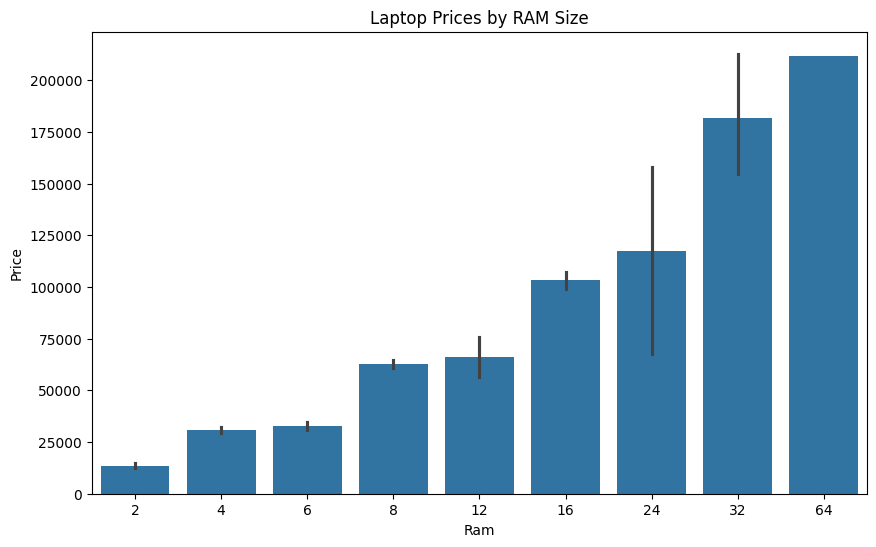

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ram', y='Price', data=df)
plt.title('Laptop Prices by RAM Size')
plt.show()

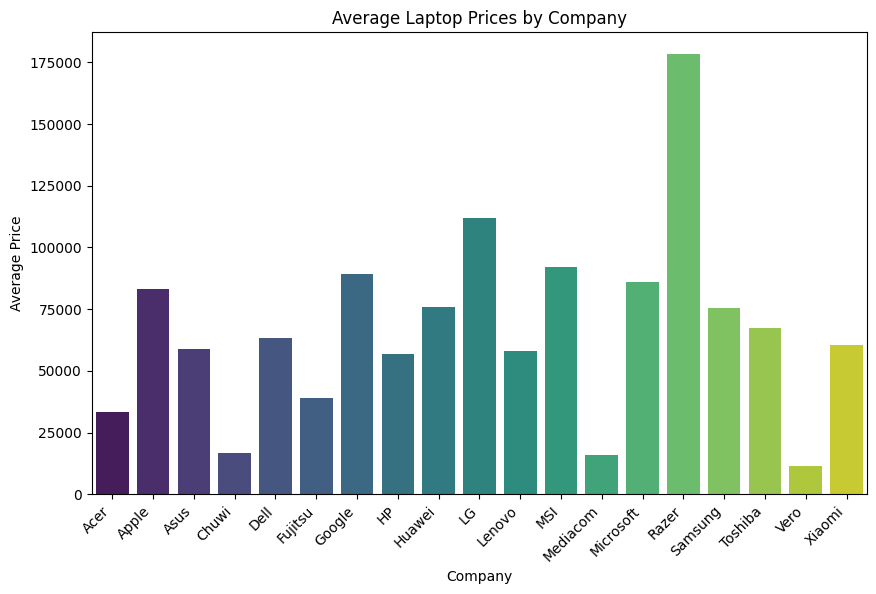

In [43]:
avg_price = df.groupby('Company')['Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Price', data=avg_price, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Laptop Prices by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.show()

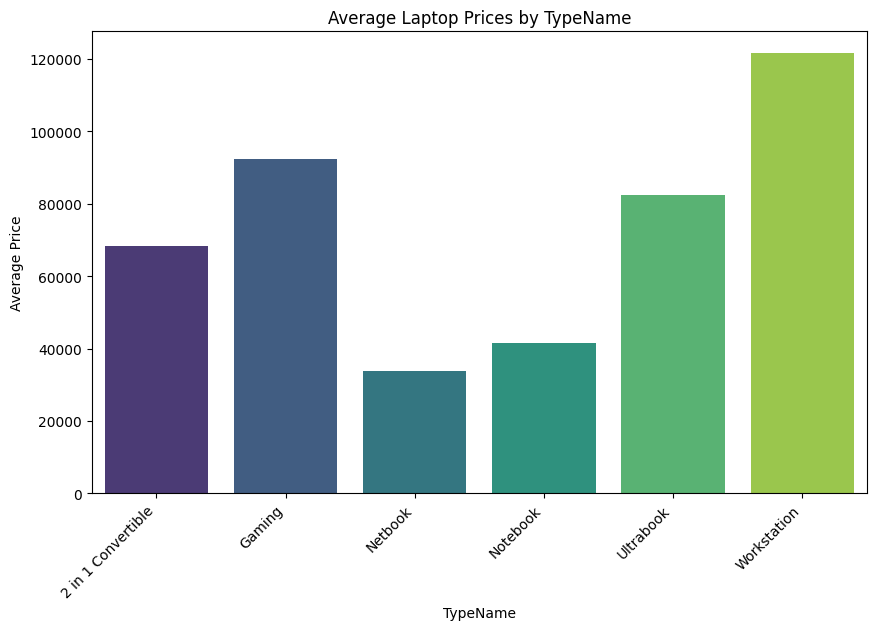

In [44]:
avg_price = df.groupby('TypeName')['Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='TypeName', y='Price', data=avg_price, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Laptop Prices by TypeName')
plt.xlabel('TypeName')
plt.ylabel('Average Price')
plt.show()

## Result

### An R² score of 84.8% was achieved using XGBRegressor. The factors influencing laptop prices have been identified, and various feature engineering techniques have been applied.